In [1]:
import pandas as pd
all_surveys_data = pd.read_csv(r'C:\Users\MichalinaJanik\PycharmProjects\coding-fairness\dataset\netsense\demsurveyMergedCodedDisID.csv')


all_cols = all_surveys_data.columns




In [2]:

columns_to_include = [
    'computeruse',
    'contactlens',
    'eyeglasses',
    'dadrelig',
    'momrelig',
    'numberpets',
    'parentsmarriage',
    'religcateg',
    'weight',
    'major',
    'disabilitylearning',
    'gender',
    'heighttotal',
    'familymilitary',
    'fbprivacy',
    'disabilityphysical',
    'ethnicity',
    'pincome',
    'momed',
    'daded'
]

cols = [col for col in all_cols if any(col.startswith(col2) for col2 in columns_to_include)]
cols.append('egoid')
print(cols)


['major_6', 'weight_6', 'parentsmarriage_6', 'major_5', 'weight_5', 'parentsmarriage_5', 'major_4', 'weight_4', 'parentsmarriage_4', 'major_3', 'weight_3', 'parentsmarriage_3', 'major_2', 'disabilitylearning_2', 'disabilityphysical_2', 'contactlens_2', 'eyeglasses_2', 'heighttotal_2', 'weight_2', 'computeruse_2', 'fbprivacy_2', 'parentsmarriage_2', 'ethnicity_1', 'gender_1', 'major_1', 'weight_1', 'heighttotal_1', 'eyeglasses_1', 'contactlens_1', 'disabilityphysical_1', 'disabilitylearning_1', 'numberpets_1', 'computeruse_1', 'fbprivacy_1', 'parentsmarriage_1', 'pincome_1', 'momed_1', 'daded_1', 'momrelig_1', 'dadrelig_1', 'religcateg_1', 'familymilitary_1', 'egoid']


In [3]:
all_surveys_data = all_surveys_data[cols]

cols_to_drop = [col for col in cols if col.startswith('programwhich')]
all_surveys_data.drop(columns=cols_to_drop, inplace=True)

cols_with_id = all_surveys_data.columns
print(cols_with_id)

Index(['major_6', 'weight_6', 'parentsmarriage_6', 'major_5', 'weight_5',
       'parentsmarriage_5', 'major_4', 'weight_4', 'parentsmarriage_4',
       'major_3', 'weight_3', 'parentsmarriage_3', 'major_2',
       'disabilitylearning_2', 'disabilityphysical_2', 'contactlens_2',
       'eyeglasses_2', 'heighttotal_2', 'weight_2', 'computeruse_2',
       'fbprivacy_2', 'parentsmarriage_2', 'ethnicity_1', 'gender_1',
       'major_1', 'weight_1', 'heighttotal_1', 'eyeglasses_1', 'contactlens_1',
       'disabilityphysical_1', 'disabilitylearning_1', 'numberpets_1',
       'computeruse_1', 'fbprivacy_1', 'parentsmarriage_1', 'pincome_1',
       'momed_1', 'daded_1', 'momrelig_1', 'dadrelig_1', 'religcateg_1',
       'familymilitary_1', 'egoid'],
      dtype='object')


In [4]:
def drop_missing_data(df, threshold=15, axis=0):
    """
    Drops rows or columns from a DataFrame based on a missing data threshold.
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The threshold for missing data percentage to drop.
        axis (int): Axis along which to operate (0 for rows, 1 for columns).
    Returns:
        pd.DataFrame: The DataFrame after dropping rows/columns exceeding the missing data threshold.
    """
    # Calculate the percentage of missing data
    if axis == 0:  # Rows
        missing_percentage = df.isna().mean(axis=1) * 100
    elif axis == 1:  # Columns
        missing_percentage = df.isna().mean(axis=0) * 100
    else:
        raise ValueError("Invalid axis. Use 0 for rows or 1 for columns.")

    # Identify indices where the missing percentage is greater than the threshold
    indices_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop rows/columns exceeding the missing data threshold
    df_dropped = df.drop(index=indices_to_drop) if axis == 0 else df.drop(columns=indices_to_drop)

    return df_dropped

column = 1
all_surveys_data = drop_missing_data(df=all_surveys_data,threshold=20, axis=column)


In [5]:

cols_with_id = all_surveys_data.columns.values


cols_without_id = cols_with_id[cols_with_id != 'egoid']
print(cols_without_id)

['major_4' 'weight_4' 'parentsmarriage_4' 'major_3' 'weight_3'
 'parentsmarriage_3' 'major_2' 'disabilitylearning_2'
 'disabilityphysical_2' 'contactlens_2' 'eyeglasses_2' 'heighttotal_2'
 'weight_2' 'computeruse_2' 'parentsmarriage_2' 'ethnicity_1' 'gender_1'
 'major_1' 'weight_1' 'heighttotal_1' 'eyeglasses_1' 'contactlens_1'
 'disabilityphysical_1' 'disabilitylearning_1' 'numberpets_1'
 'computeruse_1' 'fbprivacy_1' 'parentsmarriage_1' 'pincome_1' 'momed_1'
 'daded_1' 'momrelig_1' 'dadrelig_1' 'familymilitary_1']


In [6]:
import numpy as np
def expand_and_consolidate(df, base_columns, target_length):
    result = {}
    cols_to_traverse = df.columns.values
    cols_to_traverse = cols_to_traverse[cols_to_traverse != 'egoid']
    if 'egoid' in df.columns:
        result['egoid'] = df['egoid']
    for base_col in base_columns:
        # Extract all columns matching the base column
        matching_columns = [col for col in cols_to_traverse if col.startswith(base_col)]
        max_existing_index = len(matching_columns)

        # Consolidate values
        consolidated = df[matching_columns[0]].copy()
        for col in matching_columns[1:]:
            mask = consolidated == df[col]
            consolidated = np.where(mask, consolidated, df[col])

        # Create new columns up to the target length
        for i in range(1, target_length + 1):
            col_name = f"{base_col}_{i}"
            if i <= max_existing_index:
                result[col_name] = consolidated
            else:
                # Fill missing values with the last known value
                result[col_name] = consolidated.copy()

    return pd.DataFrame(result)

# Find base column prefixes
base_columns = set(col.split('_')[0] for col in cols_without_id)
print(base_columns)
# Expand and consolidate for each base column to 6 occurrences
target_length = 6
consolidated_df = expand_and_consolidate(all_surveys_data, base_columns, target_length)


from IPython.display import display
display(consolidated_df)


{'contactlens', 'ethnicity', 'major', 'disabilityphysical', 'eyeglasses', 'parentsmarriage', 'weight', 'daded', 'momed', 'momrelig', 'heighttotal', 'pincome', 'disabilitylearning', 'fbprivacy', 'dadrelig', 'computeruse', 'gender', 'numberpets', 'familymilitary'}


,egoid,contactlens_1,contactlens_2,contactlens_3,contactlens_4,contactlens_5,contactlens_6,ethnicity_1,ethnicity_2,ethnicity_3,...,numberpets_3,numberpets_4,numberpets_5,numberpets_6,familymilitary_1,familymilitary_2,familymilitary_3,familymilitary_4,familymilitary_5,familymilitary_6
0,97900,NaN,NaN,NaN,NaN,NaN,NaN,White/Caucasian,White/Caucasian,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92782,Yes,Yes,Yes,Yes,Yes,Yes,White/Caucasian,White/Caucasian,White/Caucasian,...,1.0,1.0,1.0,1.0,Yes,Yes,Yes,Yes,Yes,Yes
2,96362,No,No,No,No,No,No,Other Latino,Other Latino,Other Latino,...,13.0,13.0,13.0,13.0,No,No,No,No,No,No
3,90281,Yes,Yes,Yes,Yes,Yes,Yes,White/Caucasian,White/Caucasian,White/Caucasian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91257,Yes,Yes,Yes,Yes,Yes,Yes,White/Caucasian,White/Caucasian,White/Caucasian,...,2.0,2.0,2.0,2.0,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,51597,No,No,No,No,No,No,White/Caucasian,White/Caucasian,White/Caucasian,...,8.0,8.0,8.0,8.0,Yes,Yes,Yes,Yes,Yes,Yes
200,51675,No,No,No,No,No,No,White/Caucasian,White/Caucasian,White/Caucasian,...,4.0,4.0,4.0,4.0,Yes,Yes,Yes,Yes,Yes,Yes
201,65102,Yes,Yes,Yes,Yes,Yes,Yes,White/Caucasian,White/Caucasian,White/Caucasian,...,5.0,5.0,5.0,5.0,Yes,Yes,Yes,Yes,Yes,Yes
202,84472,No,No,No,No,No,No,White/Caucasian,White/Caucasian,White/Caucasian,...,5.0,5.0,5.0,5.0,Yes,Yes,Yes,Yes,Yes,Yes


In [7]:
# Function to reshape the DataFrame
def reshape_to_survey_format(df, base_columns, target_length):
    rows = []
    egoid_column = 'egoid'

    for _, row in df.iterrows():
        for i in range(1, target_length + 1):
            survey_row = {f'{base_col}': row[f'{base_col}_{i}'] for base_col in base_columns}
            survey_row['SurveyNr'] = i
            if egoid_column in row:
                survey_row[egoid_column] = row[egoid_column]
            rows.append(survey_row)

    return pd.DataFrame(rows)

In [8]:
reshaped_df = reshape_to_survey_format(consolidated_df, base_columns, 6)

In [9]:
from IPython.display import display
display(reshaped_df)

,contactlens,ethnicity,major,disabilityphysical,eyeglasses,parentsmarriage,weight,daded,momed,momrelig,...,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse,gender,numberpets,familymilitary,SurveyNr,egoid
0,NaN,White/Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,1,97900
1,NaN,White/Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,2,97900
2,NaN,White/Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,3,97900
3,NaN,White/Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,4,97900
4,NaN,White/Caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,5,97900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,2,26425
1220,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,3,26425
1221,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,4,26425
1222,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,5,26425


In [10]:
reshaped_df = drop_missing_data(reshaped_df,15, axis=0)

In [11]:
display(reshaped_df)

,contactlens,ethnicity,major,disabilityphysical,eyeglasses,parentsmarriage,weight,daded,momed,momrelig,...,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse,gender,numberpets,familymilitary,SurveyNr,egoid
6,Yes,White/Caucasian,Biological Sciences: Biochemistry or Biophysics,No,Yes,Alive and living together,118.0,College Degree,College Degree,Roman Catholic,...,200000-249999,No,All my friends can see my posts,Roman Catholic,8.0,Female,1.0,Yes,1,92782
7,Yes,White/Caucasian,Biological Sciences: Biochemistry or Biophysics,No,Yes,Alive and living together,118.0,College Degree,College Degree,Roman Catholic,...,200000-249999,No,All my friends can see my posts,Roman Catholic,8.0,Female,1.0,Yes,2,92782
8,Yes,White/Caucasian,Biological Sciences: Biochemistry or Biophysics,No,Yes,Alive and living together,118.0,College Degree,College Degree,Roman Catholic,...,200000-249999,No,All my friends can see my posts,Roman Catholic,8.0,Female,1.0,Yes,3,92782
9,Yes,White/Caucasian,Biological Sciences: Biochemistry or Biophysics,No,Yes,Alive and living together,118.0,College Degree,College Degree,Roman Catholic,...,200000-249999,No,All my friends can see my posts,Roman Catholic,8.0,Female,1.0,Yes,4,92782
10,Yes,White/Caucasian,Biological Sciences: Biochemistry or Biophysics,No,Yes,Alive and living together,118.0,College Degree,College Degree,Roman Catholic,...,200000-249999,No,All my friends can see my posts,Roman Catholic,8.0,Female,1.0,Yes,5,92782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,2,26425
1220,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,3,26425
1221,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,4,26425
1222,No,White/Caucasian,Engineering: Computer Science & Engineering,No,No,Alive and living together,140.0,Graduate degree,College Degree,Roman Catholic,...,100000-149999,No,All my friends can see my posts,Roman Catholic,9.0,Male,2.0,Yes,5,26425


In [12]:
def analyze_column_values(df, columns_to_analyze):
    """
    Analyzes all possible unique values for each column in the DataFrame.
    Args:
    - df (DataFrame): The input DataFrame.
    - columns_to_analyze (list): List of columns to analyze.

    Returns:
    - values_dict (dict): Dictionary with columns as keys and their unique values as a list.
    """
    values_dict = {}

    for column in columns_to_analyze:
        # Get all unique values for the column
        unique_values = df[column].unique()
        values_dict[column] = unique_values.tolist()

    return values_dict

# Analyze all possible values for the specified columns
columns_to_analyze = reshaped_df.columns.drop(['egoid', 'SurveyNr'])  # Exclude identifiers
column_values_dict = analyze_column_values(reshaped_df, columns_to_analyze)

# Convert to a DataFrame-friendly format for display
column_values_df = pd.DataFrame(
    [{"Column": col, "Unique Values": values} for col, values in column_values_dict.items()]
)

# Set Pandas option to display full column content
pd.set_option('display.max_colwidth', None)

display(column_values_df)


,Column,Unique Values
0,contactlens,"[Yes, No]"
1,ethnicity,"[White/Caucasian, Other Latino, Mexican American/Chicano, Asian American/Asian, African American/Black, Other, American Indian/Alaska Native, Puerto Rican]"
2,major,"[Biological Sciences: Biochemistry or Biophysics, Physical Science: Physics, Engineering: Mechanical Engineering, Professional: Other Professional, Physical Science: Mathematics, Social Science: Political Sciences ( govât., international relations), Business: Finance, Business: Business Admin (general), Social Science: Anthropology, Business: International Business, Other Fields: Undecided, Engineering: Chemical Engineering, Business: Management, Engineering: Civil Engineering, Business: Marketing, Professional: Therapy (occupational, physical, speech), Engineering: Other Engineering, Professional: Medicine, Dentistry, Veterinary Medicine, Business: Accounting, Arts and Humanities: Other Arts and Humanities, Biological Sciences: Biology (general), Social Science: Psychology, Arts and Humanities: English ( language and literature), Physical Science: Chemistry, Engineering: Computer Science & Engineering, Arts and Humanities: Language and Literature (except English), Social Science: Other Social Science, Social Science: Economics, Arts and Humanities: Theology or Religion, Engineering: Aeronautical or Astronautical Eng., Biological Sciences: Environmental Science, Engineering: Electrical or Electronic Engineering, Arts and Humanities: History, Arts and Humanities: Music, Arts and Humanities: Journalism, Arts and Humanities: Philosophy, Arts and Humanities: Art, fine and applied, Other Fields: Other Field, Social Science: Public Policy, Professional: Architecture or Urban Planning]"
3,disabilityphysical,"[No, nan]"
4,eyeglasses,"[Yes, No]"
5,parentsmarriage,"[Alive and living together, Alive, but divorced or living apart, nan, One of them deceased]"
6,weight,"[118.0, 125.0, 180.0, 135.0, 132.0, 218.0, 185.0, 195.0, 110.0, 150.0, 163.0, 145.0, 140.0, 160.0, 158.0, 165.0, 230.0, 120.0, 155.0, 117.0, 100.0, 130.0, 152.0, 170.0, 115.0, 105.0, 210.0, 167.0, 103.0, 190.0, 128.0, 137.0, 211.0, 175.0, 187.0, 146.0, 166.0, 250.0, 126.0, 138.0, 178.0, 177.0, 200.0, 119.0, 113.0, 147.0, 161.0, 153.0, 169.0, 198.0, 204.0, 134.0, 111.0, 121.25, 255.0, 149.0, 95.0, 182.0, 107.0, 174.0]"
7,daded,"[College Degree, Graduate degree, Some college, High school Graduate, Some high school, Not sure, Some graduate school, Junior High/middle school or less, Postsecondary school other than college]"
8,momed,"[College Degree, Graduate degree, Some graduate school, High school Graduate, Some high school, Some college, Not sure, Postsecondary school other than college]"
9,momrelig,"[Roman Catholic, Methodist, nan, Not applicable, Other Christian, Baptist, Agnostic, United Church of Crhist/Congregational, Presbyterian, Not Sure, Hindu, LDS (Mormon), Buddhist, Jewish, Lutheran, Atheist]"


In [13]:
import pandas as pd
import numpy as np

# Function to safely convert strings to numerical values
def safe_convert_to_float(value):
    """
    Safely converts a value to float. If conversion fails, returns NaN.
    """
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

# Updated custom bins with mappings for broader groups
custom_bins = {
    "weight": {
        "<120": lambda x: safe_convert_to_float(x) < 120,
        "120-150": lambda x: 120 <= safe_convert_to_float(x) <= 150,
        "150-180": lambda x: 150 < safe_convert_to_float(x) <= 180,
        ">180": lambda x: safe_convert_to_float(x) > 180,
    },
     "disabilitylearning": {
        "No": lambda x: str(x).lower() == "no",
        "Yes": lambda x: str(x).lower() == "yes",
        "Unknown": lambda x: pd.isna(x) or str(x).lower() == "nan",
    },
    "ethnicity": {
        "Caucasian": lambda x: "white/caucasian" in str(x).lower(),
        "Latino": lambda x: "latino" in str(x).lower() or "mexican american" in str(x).lower() or "puerto rican" in str(x).lower(),
        "Asian": lambda x: "asian" in str(x).lower(),
        "Black": lambda x: "african american" in str(x).lower(),
        "Other": lambda x: "other" in str(x).lower(),
        "Native American": lambda x: "american indian" in str(x).lower(),
    },
    "disabilityphysical": {
        "No": lambda x: str(x).lower() == "no",
        "Yes": lambda x: str(x).lower() == "yes",
        "Unknown": lambda x: pd.isna(x) or str(x).lower() == "nan",
    },
    "momrelig": {
        "Christian": lambda x: any(sub in str(x).lower() for sub in ["roman catholic", "methodist", "baptist", "presbyterian", "united church", "lutheran"]),
        "Non-Christian": lambda x: any(sub in str(x).lower() for sub in ["hindu", "buddhist", "jewish"]),
        "Agnostic/Atheist": lambda x: any(sub in str(x).lower() for sub in ["agnostic", "atheist"]),
        "Other/Unknown": lambda x: pd.isna(x) or "not sure" in str(x).lower() or "not applicable" in str(x).lower(),
    },
    "daded": {
        "High School or Less": lambda x: any(sub in str(x).lower() for sub in ["high school", "junior high"]),
        "Some College": lambda x: "some college" in str(x).lower(),
        "Graduate Degree": lambda x: "graduate degree" in str(x).lower(),
        "Unknown": lambda x: pd.isna(x) or "not sure" in str(x).lower(),
    },
    "familymilitary": {
        "Connected": lambda x: str(x).lower() == "yes",
        "Not Connected": lambda x: str(x).lower() == "no",
    },
    "heighttotal": {
        "<60": lambda x: safe_convert_to_float(x) < 60,
        "60-65": lambda x: 60 <= safe_convert_to_float(x) <= 65,
        "65-70": lambda x: 65 < safe_convert_to_float(x) <= 70,
        "70+": lambda x: safe_convert_to_float(x) > 70,
    },
    "numberpets": {
        "0": lambda x: safe_convert_to_float(x) == 0,
        "1-2": lambda x: 1 <= safe_convert_to_float(x) <= 2,
        "3-5": lambda x: 3 <= safe_convert_to_float(x) <= 5,
        "6+": lambda x: safe_convert_to_float(x) > 5,
    },
    "computeruse": {
        "<5 hours": lambda x: safe_convert_to_float(x) < 5,
        "5-7 hours": lambda x: 5 <= safe_convert_to_float(x) <= 7,
        "8+ hours": lambda x: safe_convert_to_float(x) > 7,
    },
    "pincome": {
        "Very Low (<10k)": lambda x: "less than 10k" in str(x).lower(),
        "Low (<40k)": lambda x: any(inc in str(x) for inc in ["10000", "15000", "20000", "25000", "30000", "40000"]),
        "Middle (40k-100k)": lambda x: any(inc in str(x) for inc in ["50000", "60000", "75000", "99999"]),
        "High (100k-250k)": lambda x: any(inc in str(x) for inc in ["100000", "150000", "200000", "249999"]),
        "Very High (>250k)": lambda x: "250000 or more" in str(x).lower(),
        "Not Sure": lambda x: "not sure" in str(x).lower(),
        "Unknown": lambda x: pd.isna(x) or "nan" in str(x).lower(),
    },
    "parentsmarriage": {
        "Together": lambda x: "alive and living together" in str(x).lower(),
        "Divorced/Separated": lambda x: "alive, but divorced" in str(x).lower(),
        "Deceased": lambda x: "one of them deceased" in str(x).lower(),
        "Unknown": lambda x: pd.isna(x) or "nan" in str(x).lower(),
    },
    "major": {
        "Science": lambda x: any(sub in str(x).lower() for sub in ["biological sciences", "physics", "chemistry", "mathematics"]),
        "Engineering": lambda x: "engineering" in str(x).lower(),
        "Business": lambda x: "business" in str(x).lower(),
        "Arts and Humanities": lambda x: any(sub in str(x).lower() for sub in ["arts", "music", "philosophy", "english", "literature", "history"]),
        "Social Science": lambda x: any(sub in str(x).lower() for sub in ["political sciences", "psychology", "anthropology", "economics"]),
        "Professional Studies": lambda x: any(sub in str(x).lower() for sub in ["medicine", "dentistry", "veterinary", "therapy", "architecture"]),
        "Other": lambda x: "undecided" in str(x).lower() or "other" in str(x).lower(),
    },
        "fbprivacy": {
        "Public": lambda x: "public" in str(x).lower(),
        "Friends Only": lambda x: "all my friends" in str(x).lower(),
        "Some Friends": lambda x: "only some of my friends" in str(x).lower(),
        "Private": lambda x: "no one can see" in str(x).lower(),
        "Unknown": lambda x: pd.isna(x) or "nan" in str(x).lower(),
    },
    "dadrelig": {
        "Christian": lambda x: any(sub in str(x).lower() for sub in ["roman catholic", "methodist", "baptist", "presbyterian", "united church", "lutheran"]),
        "Non-Christian": lambda x: any(sub in str(x).lower() for sub in ["hindu", "buddhist", "jewish"]),
        "Agnostic/Atheist": lambda x: any(sub in str(x).lower() for sub in ["agnostic", "atheist"]),
        "Other/Unknown": lambda x: pd.isna(x) or "not sure" in str(x).lower() or "not applicable" in str(x).lower(),
    },
    "eyeglasses": {
        "Yes": lambda x: str(x).lower() == "yes",
        "No": lambda x: str(x).lower() == "no",
    },
    "momed": {
        "High School or Less": lambda x: any(sub in str(x).lower() for sub in ["high school", "junior high"]),
        "Some College": lambda x: "some college" in str(x).lower(),
        "Graduate Degree": lambda x: "graduate degree" in str(x).lower(),
        "Unknown": lambda x: pd.isna(x) or "not sure" in str(x).lower(),
    },
}

# Function to bin or group column values
def bin_column_values(df, column, bins):
    """
    Groups column values into specified bins using mapping logic.
    """
    def map_value(value):
        for bin_label, condition in bins.items():
            if condition(value):
                return bin_label
        return "Other"  # Default category for unmatched values

    return df[column].map(map_value)

# Apply custom bins to each column in the DataFrame
def apply_custom_bins(df, custom_bins):
    """
    Applies custom bins to the specified columns in the DataFrame.
    """
    for column, bins in custom_bins.items():
        if column in df.columns:
            df[column] = bin_column_values(df, column, bins)
    return df

# Convert specified columns to numeric
def convert_columns_to_numeric(df, columns):
    """
    Converts specified columns in the DataFrame to numeric.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].apply(safe_convert_to_float)
    return df

# Apply the transformations
numeric_columns = ["weight", "heighttotal", "numberpets", "computeruse"]
reshaped_df = convert_columns_to_numeric(reshaped_df, numeric_columns)
binned_df = apply_custom_bins(reshaped_df, custom_bins)

display(binned_df)


,contactlens,ethnicity,major,disabilityphysical,eyeglasses,parentsmarriage,weight,daded,momed,momrelig,...,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse,gender,numberpets,familymilitary,SurveyNr,egoid
6,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,1,92782
7,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,2,92782
8,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,3,92782
9,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,4,92782
10,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,5,92782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,2,26425
1220,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,3,26425
1221,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,4,26425
1222,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,5,26425


C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


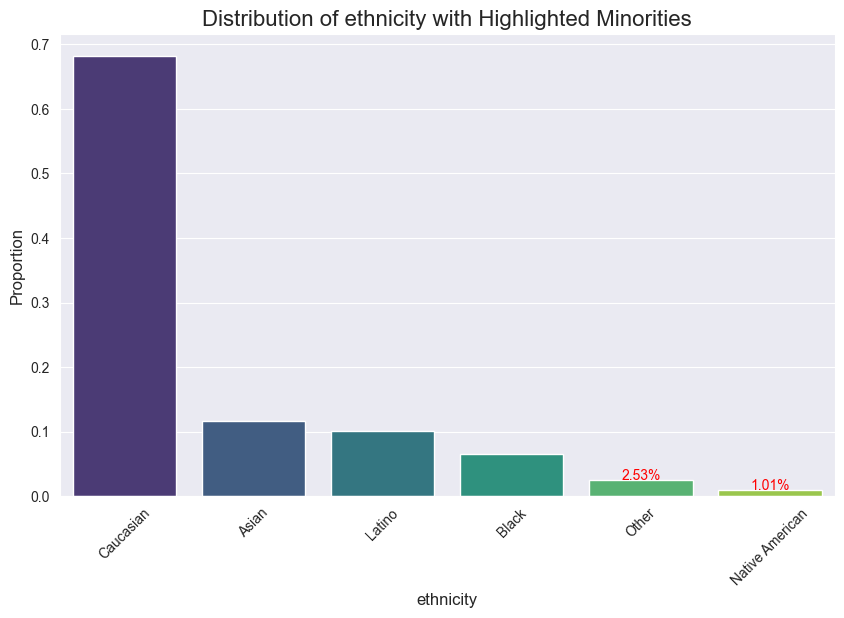

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


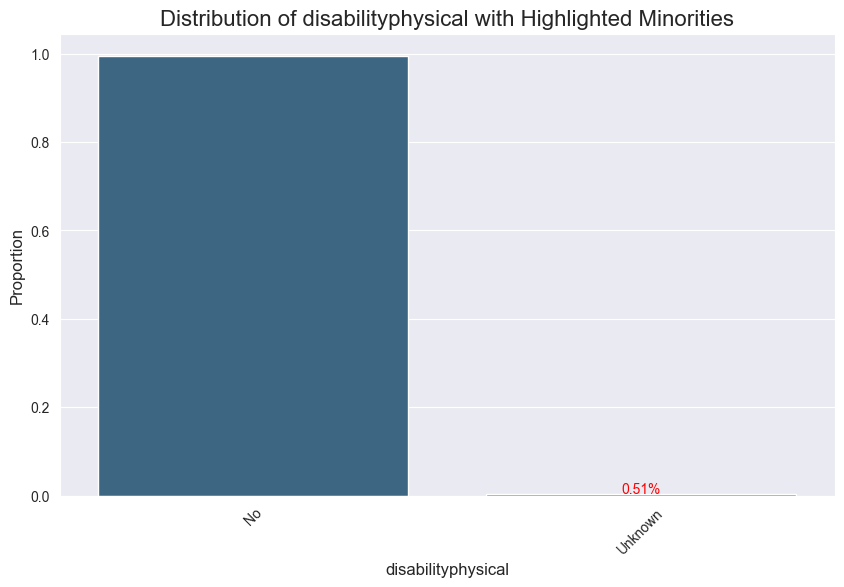

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


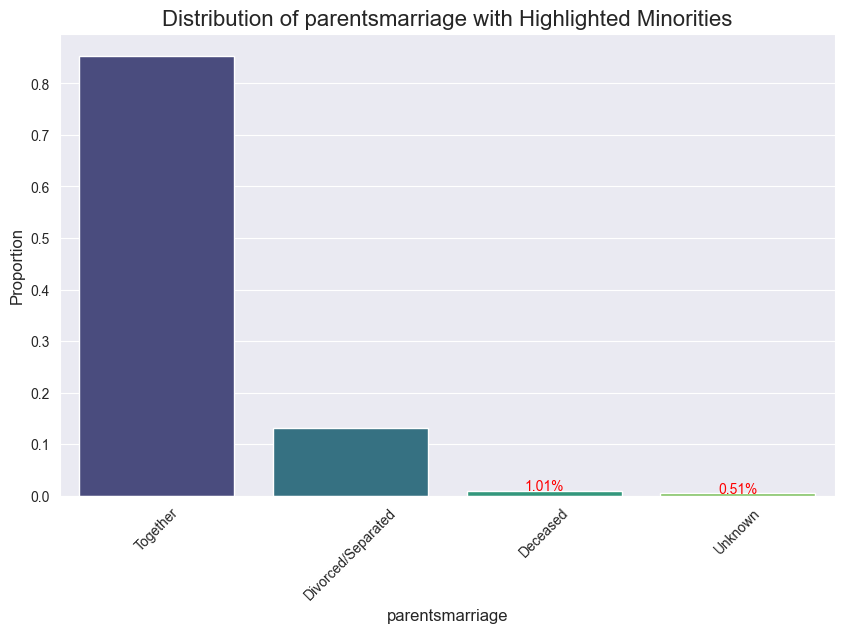

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


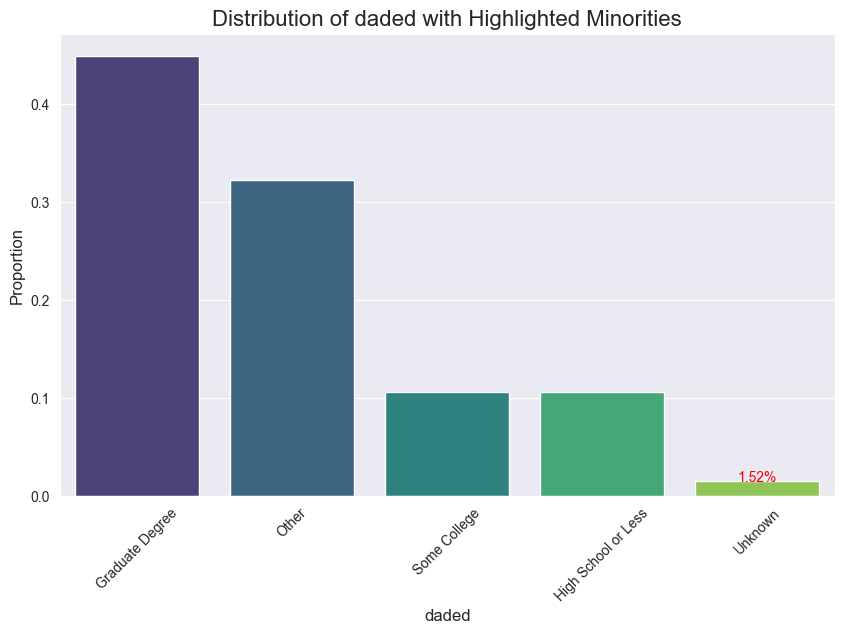

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


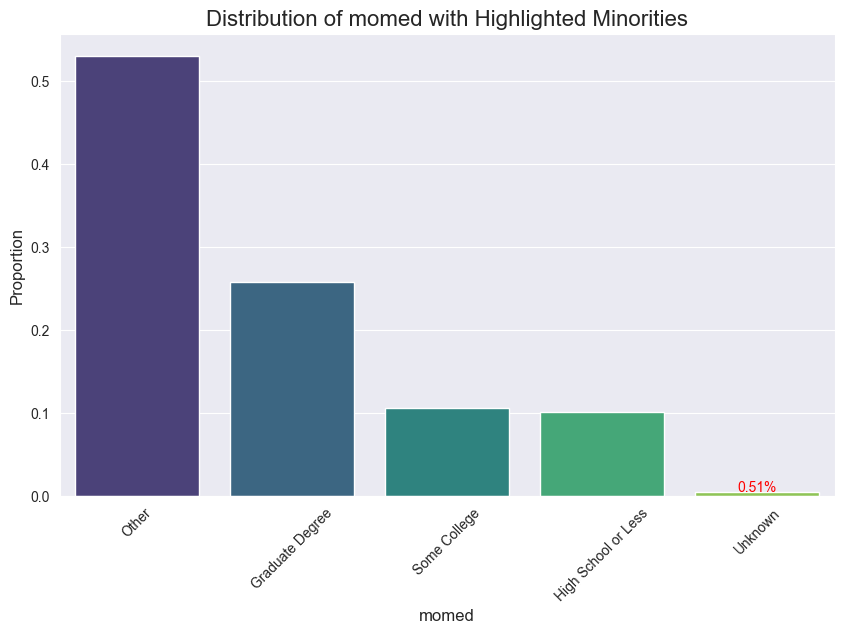

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


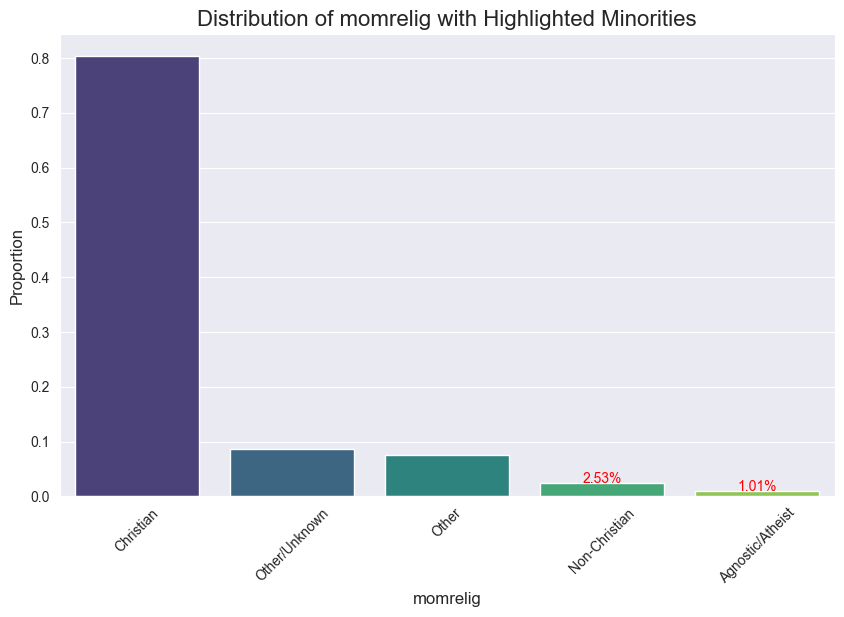

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


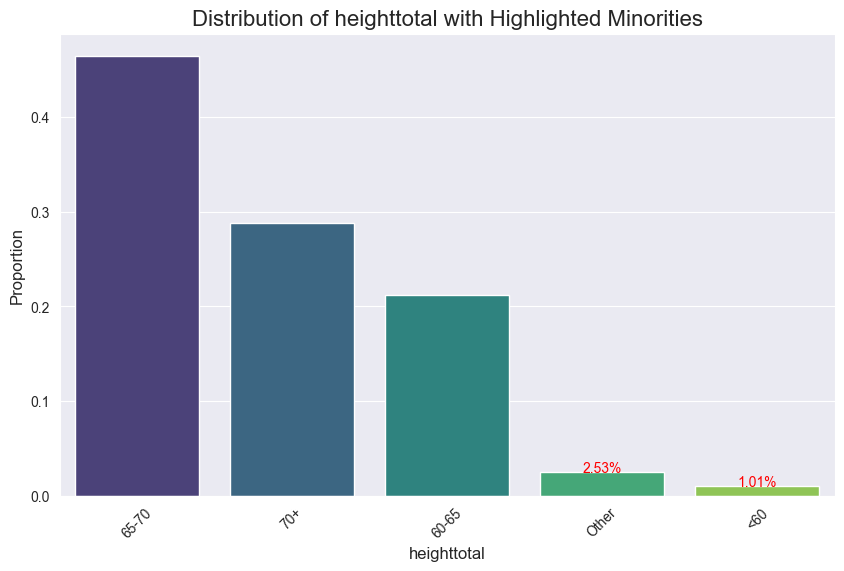

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


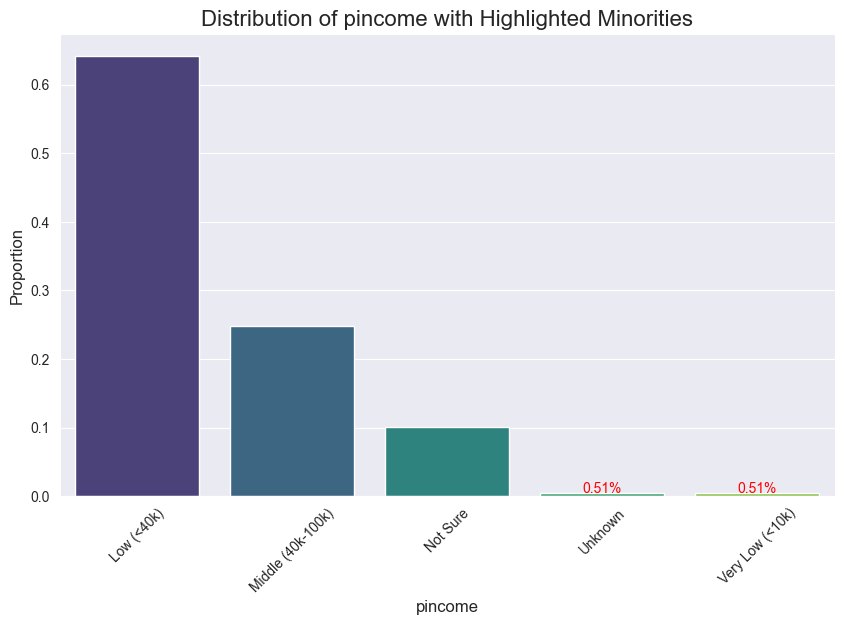

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


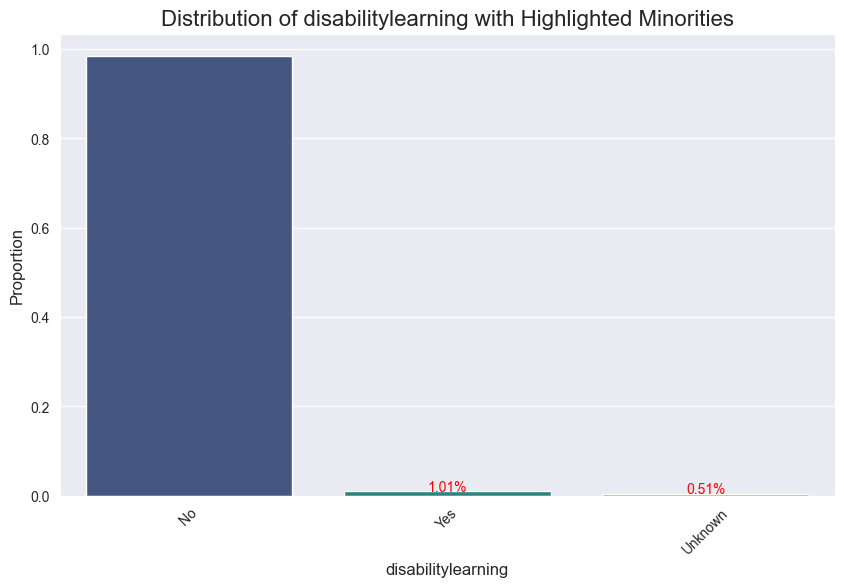

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


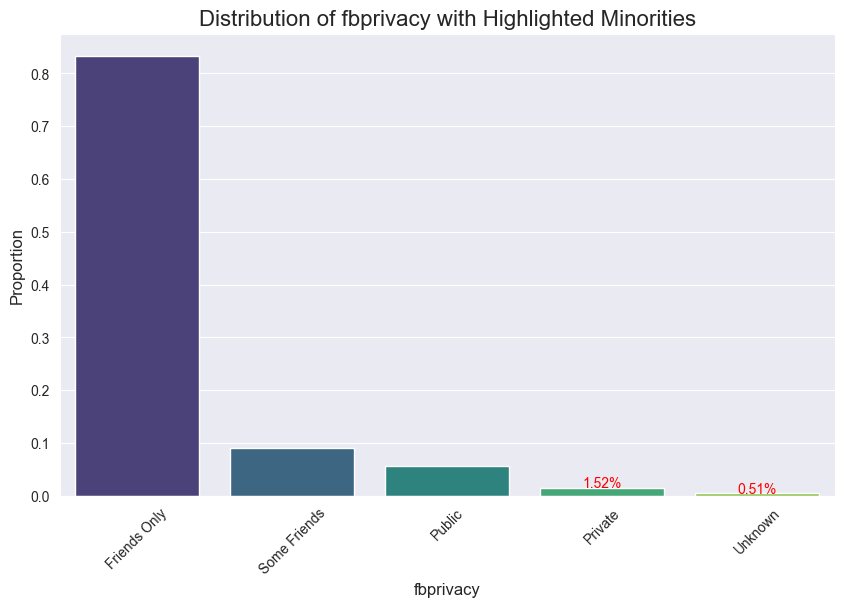

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


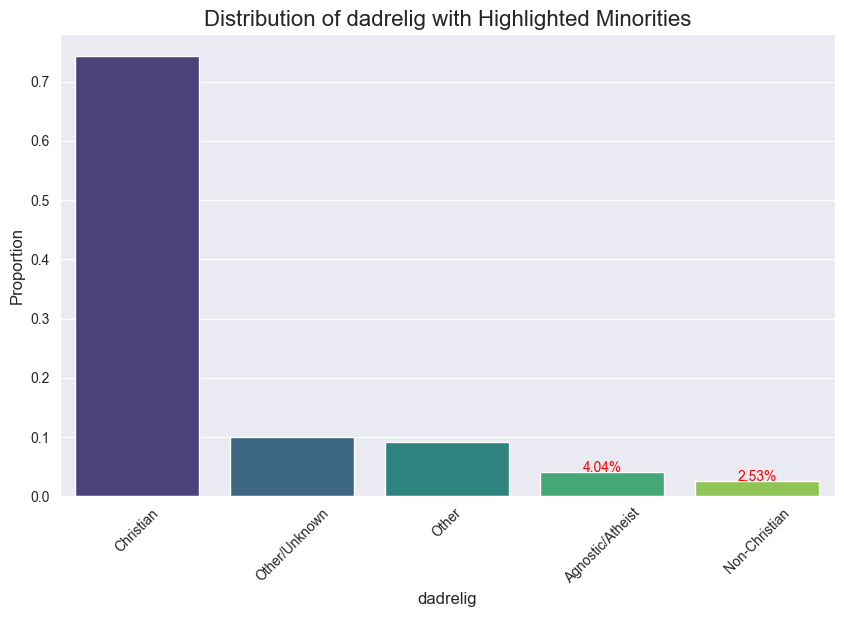

C:\Users\MichalinaJanik\AppData\Local\Temp\ipykernel_29892\3986702202.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)


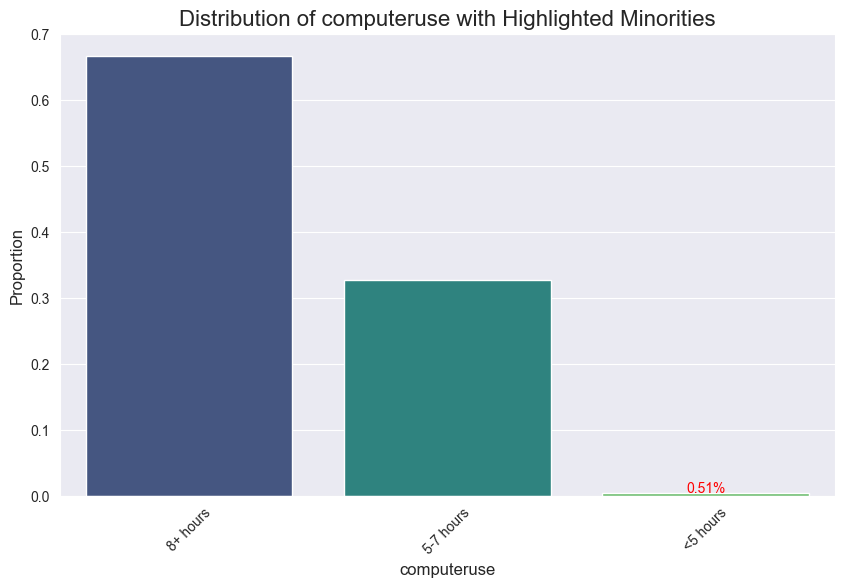

,ethnicity,disabilityphysical,parentsmarriage,daded,momed,momrelig,heighttotal,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse
Other,0.025253,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.025253,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities
Native American,0.010101,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities
Unknown,No Minorities,0.005051,0.005051,0.015152,0.005051,No Minorities,No Minorities,0.005051,0.005051,0.005051,No Minorities,No Minorities
Deceased,No Minorities,No Minorities,0.010101,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities
Non-Christian,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.025253,No Minorities,No Minorities,No Minorities,No Minorities,0.025253,No Minorities
Agnostic/Atheist,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.010101,No Minorities,No Minorities,No Minorities,No Minorities,0.040404,No Minorities
<60,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.010101,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities
Very Low (<10k),No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.005051,No Minorities,No Minorities,No Minorities,No Minorities
Yes,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.010101,No Minorities,No Minorities,No Minorities
Private,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,No Minorities,0.015152,No Minorities,No Minorities


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_and_plot_minority_distribution(df, columns_to_analyze, threshold=0.05):
    """
    Analyzes variability and distribution of the given columns to detect minorities and plots only those with minorities.
    Args:
    - df (DataFrame): The input DataFrame.
    - columns_to_analyze (list): List of columns to analyze.
    - threshold (float): Proportion threshold to consider a value as a minority.

    Returns:
    - minority_info (dict): Dictionary containing minority values for each column.
    """
    minority_info = {}

    for column in columns_to_analyze:
        # Calculate value counts and proportions
        value_counts = df[column].value_counts(normalize=True)

        # Identify minorities based on the threshold
        minorities = value_counts[value_counts < threshold]

        # If there are minorities, store the information and plot
        if not minorities.empty:
            minority_info[column] = minorities

            # Plot the distribution
            plt.figure(figsize=(10, 6))
            sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", hue=None, legend=False)
            plt.title(f"Distribution of {column} with Highlighted Minorities", fontsize=16)
            plt.xlabel(column, fontsize=12)
            plt.ylabel("Proportion", fontsize=12)
            plt.xticks(rotation=45)

            # Highlight minorities
            for idx, value in minorities.items():
                plt.text(idx, value, f"{value:.2%}", color="red", ha="center")

            plt.show()

    return minority_info

# Analyze and plot only those columns with minorities
columns_to_analyze = binned_df.columns.drop(['egoid', 'SurveyNr'])  # Exclude identifiers
minority_info = analyze_and_plot_minority_distribution(binned_df, columns_to_analyze)

# Display minority details
minority_info_df = pd.DataFrame({k: v.to_dict() for k, v in minority_info.items()}).fillna("No Minorities")
display(minority_info_df)


In [15]:
binned_df.columns

Index(['contactlens', 'ethnicity', 'major', 'disabilityphysical', 'eyeglasses',
       'parentsmarriage', 'weight', 'daded', 'momed', 'momrelig',
       'heighttotal', 'pincome', 'disabilitylearning', 'fbprivacy', 'dadrelig',
       'computeruse', 'gender', 'numberpets', 'familymilitary', 'SurveyNr',
       'egoid'],
      dtype='object')

In [16]:
def identify_column_types(df, exclude_numerical=None):
    """
    Identifies categorical and numerical columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        exclude_numerical (list of str, optional): List of column names to exclude from numerical columns.

    Returns:
        tuple: Returns two lists, one for categorical columns and one for numerical columns.
    """
    if exclude_numerical is None:
        exclude_numerical = []

    # Identify columns by data type
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Exclude specified columns from numerical columns
    numerical_cols = [col for col in numerical_cols if col not in exclude_numerical]

    return categorical_cols, numerical_cols

categorical_cols, numerical_cols = identify_column_types(binned_df)


print(categorical_cols)

['contactlens', 'ethnicity', 'major', 'disabilityphysical', 'eyeglasses', 'parentsmarriage', 'weight', 'daded', 'momed', 'momrelig', 'heighttotal', 'pincome', 'disabilitylearning', 'fbprivacy', 'dadrelig', 'computeruse', 'gender', 'numberpets', 'familymilitary']


In [17]:
from sklearn.impute import SimpleImputer
def impute_missing_values(df, numerical_cols, categorical_cols):
    """
    Imputes missing values in a DataFrame for numerical and categorical columns.

    Parameters:
        df (pd.DataFrame): The DataFrame with missing values to impute.
        numerical_cols (list of str): List of column names for numerical data.
        categorical_cols (list of str): List of column names for categorical data.

    Returns:
        pd.DataFrame: The DataFrame with imputed values.
    """
    # Imputing numerical data
    if numerical_cols:  # Ensure there are numerical columns to process
        num_imputer = SimpleImputer(strategy='mean')
        df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols].apply(pd.to_numeric, errors='coerce'))

    # Imputing categorical data
    if categorical_cols:  # Ensure there are categorical columns to process
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    return df

binned_df = impute_missing_values(binned_df, [], categorical_cols)

In [18]:
def calculate_missing_data(df):
    """
    Calculates and prints the percentage of missing data per row and per column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        tuple: Returns two pandas Series, one for row-wise and one for column-wise missing data percentages.
    """
    # Calculate the percentage of missing data per row
    row_missing_percentage = df.isnull().mean(axis=1) * 100
    # Calculate the percentage of missing data per column
    col_missing_percentage = df.isnull().mean() * 100

    # Optionally print the results
    print("Percentage of Missing Data per Row:")
    print(row_missing_percentage)
    print("\nPercentage of Missing Data per Column:")
    print(col_missing_percentage)

    return row_missing_percentage, col_missing_percentage


row_missing_percentage, col_missing_percentage = calculate_missing_data(binned_df)

Percentage of Missing Data per Row:
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
       ... 
1219    0.0
1220    0.0
1221    0.0
1222    0.0
1223    0.0
Length: 1188, dtype: float64

Percentage of Missing Data per Column:
contactlens           0.0
ethnicity             0.0
major                 0.0
disabilityphysical    0.0
eyeglasses            0.0
parentsmarriage       0.0
weight                0.0
daded                 0.0
momed                 0.0
momrelig              0.0
heighttotal           0.0
pincome               0.0
disabilitylearning    0.0
fbprivacy             0.0
dadrelig              0.0
computeruse           0.0
gender                0.0
numberpets            0.0
familymilitary        0.0
SurveyNr              0.0
egoid                 0.0
dtype: float64


In [19]:
display(binned_df)

,contactlens,ethnicity,major,disabilityphysical,eyeglasses,parentsmarriage,weight,daded,momed,momrelig,...,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse,gender,numberpets,familymilitary,SurveyNr,egoid
6,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,1,92782
7,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,2,92782
8,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,3,92782
9,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,4,92782
10,Yes,Caucasian,Science,No,Yes,Together,<120,Other,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Female,1-2,Connected,5,92782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,2,26425
1220,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,3,26425
1221,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,4,26425
1222,No,Caucasian,Engineering,No,No,Together,120-150,Graduate Degree,Other,Christian,...,Low (<40k),No,Friends Only,Christian,8+ hours,Male,1-2,Connected,5,26425


In [20]:

categorical_cols, numerical_cols = identify_column_types(binned_df)
print(categorical_cols)

['contactlens', 'ethnicity', 'major', 'disabilityphysical', 'eyeglasses', 'parentsmarriage', 'weight', 'daded', 'momed', 'momrelig', 'heighttotal', 'pincome', 'disabilitylearning', 'fbprivacy', 'dadrelig', 'computeruse', 'gender', 'numberpets', 'familymilitary']


In [21]:
from sklearn.preprocessing import LabelEncoder

print(numerical_cols)
encoder = LabelEncoder()
for col in categorical_cols:
    binned_df[col] = encoder.fit_transform(binned_df[col])

['SurveyNr', 'egoid']


In [22]:
binned_df.to_csv(r'C:\Users\MichalinaJanik\PycharmProjects\coding-fairness\Demographic_Features\data\pure_demographical_data.csv')

In [23]:
display(binned_df)

,contactlens,ethnicity,major,disabilityphysical,eyeglasses,parentsmarriage,weight,daded,momed,momrelig,...,pincome,disabilitylearning,fbprivacy,dadrelig,computeruse,gender,numberpets,familymilitary,SurveyNr,egoid
6,1,2,5,0,1,2,2,2,2,1,...,0,0,0,1,1,0,1,0,1,92782
7,1,2,5,0,1,2,2,2,2,1,...,0,0,0,1,1,0,1,0,2,92782
8,1,2,5,0,1,2,2,2,2,1,...,0,0,0,1,1,0,1,0,3,92782
9,1,2,5,0,1,2,2,2,2,1,...,0,0,0,1,1,0,1,0,4,92782
10,1,2,5,0,1,2,2,2,2,1,...,0,0,0,1,1,0,1,0,5,92782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,0,2,2,0,0,2,0,0,2,1,...,0,0,0,1,1,1,1,0,2,26425
1220,0,2,2,0,0,2,0,0,2,1,...,0,0,0,1,1,1,1,0,3,26425
1221,0,2,2,0,0,2,0,0,2,1,...,0,0,0,1,1,1,1,0,4,26425
1222,0,2,2,0,0,2,0,0,2,1,...,0,0,0,1,1,1,1,0,5,26425
